In [15]:
# scientific python stuff
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# then custom code
import single_neuron_simulations as sims # single cells simulation code
import theoretical_tools as th
import plots
import demo

In [67]:
## model parameters

membrane_params = {\
'El' : -70e-3,
'Cm': 200e-12,
'Gl' : 10e-9}

synaptic_params = {\
'Te' : 5e-3,
'Ti' : 5e-3,
'Ee' : 0e-3,
'Ei' : -80e-3,
'Qi' : 20e-9,
'Qe' : 2e-9}

network_params = {\
'Ntot'  : 10000,
'pconnec'  : 0.02,
'gei' : .2}

spiking_params = {\
'Vthre' : -50e-3,
'Vreset':-60e-3,
'Vpeak':0e-3, # estethic
'Trefrac':5e-3,
'a' : 0.,
'b' : 40e-12,
'tauw' : 600e-3,
'delta_v' : 2e-3}

# full params, neuron + network !
params = dict(membrane_params.items()+network_params.items()+synaptic_params.items()+spiking_params.items())


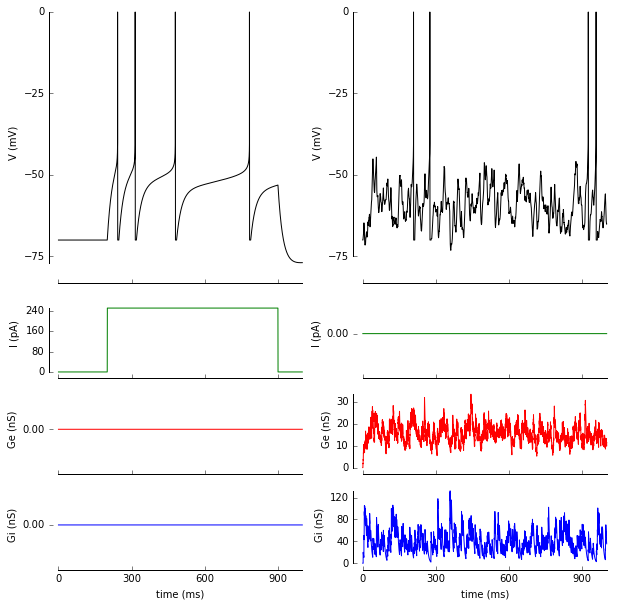

In [70]:
fig = demo.demo_plot(P=params, I0=250e-12) # a demo of what is the neuron doing, see demo.py for controlling its parameters

In [71]:
# we first generate numerically the Transfer Functions data, nearly 10 min
reload(sims)
sims.generate_transfer_function(params, filename='example_data.npy',\
                                       MAXfexc=30, MINfinh=2, MAXfinh=20,\
                                       discret_exc=10,discret_inh=5,\
                                       MAXfout=30, tstop=1., dt=1e-4, SEED=2)

numerical TF data saved in : example_data.npy


In [72]:
# then fitting procedure
reload(th)
P = th.make_fit_from_data('example_data.npy', with_square_terms=True) # parameters are in the data, no need to pass them

  status: 1
    nfev: 2200
 success: False
     fun: 0.25593610430396607
       x: array([-0.05297078,  0.00819449, -0.00656368,  0.00876586,  0.0002056 ,
        0.00383518,  0.04675071,  0.10407989, -0.02347836,  0.02427956,
       -0.06228554])
 message: 'Maximum number of function evaluations has been exceeded.'
     nit: 1553
[ -52.97078061    8.19449181   -6.56367741    8.76585832    0.20560104
    3.8351846    46.75070962  104.07988992  -23.47836029   24.27956328
  -62.2855429 ] mV
coefficients saved in  example_data_fit.npy


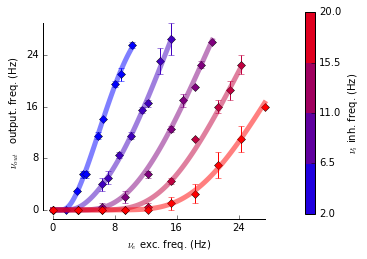

In [73]:
# plot numerical data and fit
reload(plots)
plots.make_exc_inh_fig('example_data.npy', P=P) # need to pass the fit as an argument

the network is then gonna be stable only above 2Hz external drive (bu only mean field prediction !)


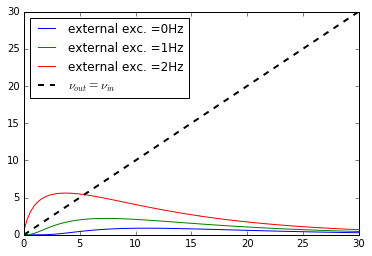

In [76]:
# now, studying the network dynamics of this model

# response to comodulated input, see e.g. Kumar et al. 2008 or El Boustani & Destexhe 2009

F = np.linspace(0, 30, 1e2) # 0-30 Hz

for external_excitation in [0, 1, 2]:
    plt.plot(F, th.TF_my_template(F+external_excitation, F, *th.pseq_params(params)),\
                               label='external exc. ='+str(external_excitation)+'Hz')
plt.plot(F, F, 'k--', lw=2, label='$\\nu_{out}=\\nu_{in}$')   
plt.legend(loc='best')

print 'the network is then gonna be stable only above 2Hz external drive (bu only mean field prediction !)'